In [23]:
import sys
sys.path.append("../")
import rg
from rg.graph import incidence_matrix
from rg.graph import ring_diagram ,show_spanning_trees
from rg.graph import circuits, set_circuit_flow,set_source_sink_flow,apply_flow
from rg.graph import scalar_propagator
from rg.graph import circuit as cir
#for inline dev
import numpy as np
from sympy import * 
init_printing()

In [24]:
import cairosvg

In [63]:
systems = {}
systems["  r0"] = lambda : incidence_matrix(edges = [ [0,1], [1,2], [2,0] ],external_vertices=[0,1])
systems["  r1"] = lambda :incidence_matrix(edges = [ [0,1], [0,2], [1,4], [2,3], [3,4], [4,5],[3,5] ],external_vertices=[0,1])
systems["  r2"] = lambda :incidence_matrix(edges = [ [0,2],[2,1],[0,3], [1,4], [3,5],[3,4],[4,5] ],external_vertices=[0,1])
systems["  r3"] = lambda :incidence_matrix(edges = [ [0,1],[0,2],[1,3], [3,4], [3,5],[2,4],[2,5] ], external_vertices=[0,1])
systems["  r4"] = lambda :incidence_matrix(edges = [ [0,1],[0,2],[2,3], [3,4], [4,1],[2,5],[5,3] ], external_vertices=[0,1])
systems["  r5"] = lambda :incidence_matrix(edges = [ [0,1],[0,2],[1,3], [2,3], [3,2] ], external_vertices=[0,1])
systems["  r6"] = lambda :incidence_matrix(edges = [ [0,2],[2,1],[0,3], [3,4], [1,5], [4,5], [5,4] ],  external_vertices=[0,1])
systems["  r7"] = lambda :incidence_matrix(edges = [ [0,2], [2,3], [3,1], [1,4], [4,5], [0,4], [5,3] ],  external_vertices=[0,1])
systems["  r8"] = lambda :incidence_matrix(edges = [ [0,2],[2,3],[3,1],[1,5],[5,4],[4,3],[4,0] ], external_vertices=[0,1])
systems["  r9"] = lambda :incidence_matrix(edges = [ [0,2],[2,3],[3,4],[4,1],[1,5],[5,3],[5,0] ], external_vertices=[0,1])
systems["  r10"]= lambda :incidence_matrix(edges = [ [0,2],[2,3],[3,1],[1,4],[4,5],[5,2],[4,0] ],  external_vertices=[0,1])
systems["  r11"]= lambda :incidence_matrix(edges = [ [0,2],[2,3],[3,1],[1,4],[4,3],[4,5],[5,0] ], external_vertices=[0,1])

systems[" c0"] = lambda :incidence_matrix(edges = [ [0,2],[2,1],[0,3], [3,1] ], external_vertices=[0,1])
systems[" c1"] = lambda :incidence_matrix(edges = [ [0,2],[2,1],[0,3], [4,1], [3,5], [3,6], [4,5], [4,6] ],  external_vertices=[0,1])
systems[" c2"] = lambda :incidence_matrix(edges = [ [0,2],[2,1],[1,4], [4,5], [0,3], [5,3], [3,6], [5,6] ],  external_vertices=[0,1])
systems[" c3"] = lambda :incidence_matrix(edges = [ [0,2],[2,1], [1,4], [3,5], [4,6], [6,5], [5,6],[0,3] ], external_vertices=[0,1])
systems[" c4"] = lambda :incidence_matrix(edges = [ [0,2],[2,3], [1,4], [3,4], [1,5], [6,5], [6,3],[0,6] ], external_vertices=[0,1])
systems[" c5"] = lambda :incidence_matrix(edges = [ [0,2],[2,3], [1,3], [1,4], [4,5], [6,5], [6,3],[0,5] ], external_vertices=[0,1])
systems[" c6"] = lambda :incidence_matrix(edges = [ [0,2],[2,3], [1,3], [1,4], [4,5], [6,5], [6,2],[0,5] ],  external_vertices=[0,1])


In [64]:

systems["r0Andc0Compact"] = lambda :incidence_matrix(edges = [ [0,1], [1,0] ],external_vertices=[0,1])
systems["r1TOr6Andc1TOc3Compact"] = lambda :incidence_matrix(edges = [ [0,1], [0,2], [1,3], [2,3], [3,2] ],external_vertices=[0,1])
systems["r7TOr11Andc4TOc6Compact"] = lambda :incidence_matrix(edges = [ [0,2],[2,3],[0,3],[1,2],[1,3]],  external_vertices=[0,1])

In [66]:
r7 = incidence_matrix(edges = [ [0,2],[2,3],[0,3],[1,2],[1,3]],  external_vertices=[0,1])
set_source_sink_flow(r7)
#r7.flip_edges(1)
ring_diagram(r7)

init exceptions [0, 1, 2, 5, 6]
sourcify 0 along [0 2 5] except [0, 1, 2, 5, 6]
sinkify 1 along [3 4 6] except [5, 6]
sinkify 2 along [0 1 3] except [5, 6, 3, 4]
sinkify 3 along [1 2 4] except [5, 6, 3, 4, 0, 1]


In [67]:
r7

incidence_matrix([[ 1,  0,  1,  0,  0, -1,  0],
                  [ 0,  0,  0, -1, -1,  0, -1],
                  [-1, -1,  0,  1,  0,  0,  0],
                  [ 0,  1, -1,  0,  1,  0,  0],
                  [ 0,  0,  0,  0,  0,  1,  1]])

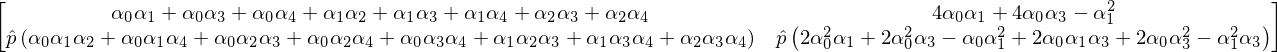

In [68]:
a,b=r7._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=r7._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([[simplify(a), simplify(a_)], [simplify(b),simplify(b_)]])

In [71]:
H = """\\documentclass[]{article}
\\usepackage[margin=0.5in]{geometry}
\\usepackage{amsmath}
\\usepackage{breqn}
\\usepackage{graphics}
\\usepackage{mathtools}
\\begin{document}"""
with open("systems.tex", "w") as f:
    f.write(H)
    keys = sorted(list(systems.keys()))
    for k in keys:
        f.write("\\section{"+k+"}")
        S = systems[k]()
        set_source_sink_flow(S)
        
        somesvg = ring_diagram(S, options={"show_labels"}).__display__()
        cairosvg.svg2pdf(somesvg, write_to='./sample_data/{}.pdf'.format(k.strip()))

        LHS = """\\vcenter{\\hbox{\\includegraphics[scale=0.7]{sample_data/"""+k.strip()+"""}}}="""
        f.write( "\\begin{dmath*} "+ LHS+str(latex(Matrix(S))) +"\\end{dmath*} ")
        
        a,b=S._symanzik_pols_(True,True,False,use_zero_mass=True)
        a_,b_=S._symanzik_pols_(True,True,True,use_zero_mass=True)
        
        f.write( "\\begin{dmath*} \Psi= "+ str(latex(simplify(a))) +"\\end{dmath*} ")
        f.write( "\\begin{dmath*} \Psi'= "+ str(latex(simplify(a_))) +"\\end{dmath*} ")
        f.write( "\\begin{dmath*} \Phi="+ str(latex(simplify(b))) +"\\end{dmath*} ")
        f.write( "\\begin{dmath*} \Phi'="+ str(latex(simplify(b_))) +"\\end{dmath*} ")

    f.write("""\\end{document}""")

init exceptions [0, 1, 3, 4]
sourcify 0 along [0 2 3] except [0, 1, 3, 4]
sourcify 2 along [1 2] except [0, 1, 3, 4, 2]
sourcify 2 along [1 2] except [0, 1, 3, 4, 2]
sinkify 1 along [0 1 4] except [2, 3, 4]
init exceptions [0, 1, 4, 7, 8]
sourcify 0 along [0 1 7] except [0, 1, 4, 7, 8]
sinkify 1 along [0 2 8] except [8, 7]
sinkify 4 along [2 4 5] except [8, 7, 0, 2]
sinkify 5 along [5 6] except [8, 7, 0, 2, 4, 5]
sinkify 3 along [3 4 6] except [8, 7, 0, 2, 4, 5, 6]
sinkify 2 along [1 3] except [8, 7, 0, 2, 4, 5, 6, 3]
init exceptions [0, 1, 3, 7, 8]
sourcify 0 along [0 6 7] except [0, 1, 3, 7, 8]
sourcify 4 along [3 4 6] except [0, 1, 3, 7, 8, 6]
sourcify 5 along [4 5] except [0, 1, 3, 7, 8, 6, 4]
sourcify 2 along [0 1 5] except [0, 1, 3, 7, 8, 6, 4, 5]
sourcify 5 along [4 5] except [0, 1, 3, 7, 8, 6, 4, 5]
sourcify 4 along [3 4 6] except [0, 1, 3, 7, 8, 6, 4, 5]
sinkify 1 along [2 3 8] except [4, 5, 6, 7, 8]
sinkify 3 along [1 2] except [4, 5, 6, 7, 8, 2, 3]
init exceptions [0, 2, 3, 

init exceptions [0, 1, 2, 3]
sourcify 0 along [0 1 2] except [0, 1, 2, 3]
sinkify 1 along [0 1 3] except [2, 3]
init exceptions [0, 1, 3, 5, 6]
sourcify 0 along [0 1 5] except [0, 1, 3, 5, 6]
sinkify 1 along [0 2 6] except [5, 6]
sinkify 3 along [2 3 4] except [5, 6, 0, 2]
sinkify 2 along [1 3 4] except [5, 6, 0, 2, 3, 4]
init exceptions [0, 1, 2, 5, 6]
sourcify 0 along [0 2 5] except [0, 1, 2, 5, 6]
sinkify 1 along [3 4 6] except [5, 6]
sinkify 2 along [0 1 3] except [5, 6, 3, 4]
sinkify 3 along [1 2 4] except [5, 6, 3, 4, 0, 1]


# r0

In [16]:
r0 = incidence_matrix(edges = [ [0,1], [1,2], [2,0] ],external_vertices=[0,1])
set_source_sink_flow(r0)
ring_diagram(r0, options={"show_labels"})
#res

init exceptions [0, 1, 3, 4]
sourcify 0 along [0 2 3] except [0, 1, 3, 4]
sourcify 2 along [1 2] except [0, 1, 3, 4, 2]
sourcify 2 along [1 2] except [0, 1, 3, 4, 2]
sinkify 1 along [0 1 4] except [2, 3, 4]


In [22]:
with open("svgout.svg","w") as f:
    f.write(ring_diagram(r0, options={"show_labels"}).__display__())

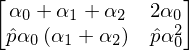

In [3]:
a,b=r0._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=r0._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([[simplify(a), simplify(a_)], [simplify(b),simplify(b_)]])

## r1

In [4]:
r1 = incidence_matrix(edges = [ [0,1], [0,2], [1,4], [2,3], [3,4], [4,5],[3,5] ],external_vertices=[0,1])
set_source_sink_flow(r1)
ring_diagram(r1, options={"show_labels"})

init exceptions [0, 1, 4, 7, 8]
sourcify 0 along [0 1 7] except [0, 1, 4, 7, 8]
sinkify 1 along [0 2 8] except [8, 7]
sinkify 4 along [2 4 5] except [8, 7, 0, 2]
sinkify 5 along [5 6] except [8, 7, 0, 2, 4, 5]
sinkify 3 along [3 4 6] except [8, 7, 0, 2, 4, 5, 6]
sinkify 2 along [1 3] except [8, 7, 0, 2, 4, 5, 6, 3]


In [5]:
#show_spanning_trees(r1)

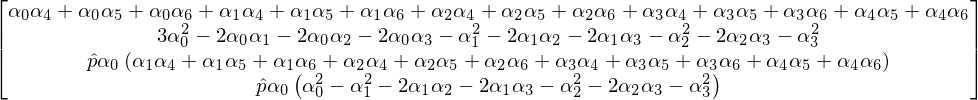

In [6]:
a,b=r1._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=r1._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([simplify(a), simplify(a_), simplify(b),simplify(b_)])

## r2

In [7]:
r2 = incidence_matrix(edges = [ [0,2],[2,1],[0,3], [1,4], [3,5],[3,4],[4,5] ],external_vertices=[0,1])
set_source_sink_flow(r2)
ring_diagram(r2, options={"show_labels"})

init exceptions [0, 2, 4, 7, 8]
sourcify 0 along [0 2 7] except [0, 2, 4, 7, 8]
sinkify 1 along [1 3 8] except [8, 7]
sinkify 2 along [0 1] except [8, 7, 1, 3]
sinkify 4 along [3 5 6] except [8, 7, 1, 3, 0]
sinkify 3 along [2 4 5] except [8, 7, 1, 3, 0, 5, 6]
sinkify 5 along [4 6] except [8, 7, 1, 3, 0, 5, 6, 2, 4]


In [8]:
#show_spanning_trees(r2)

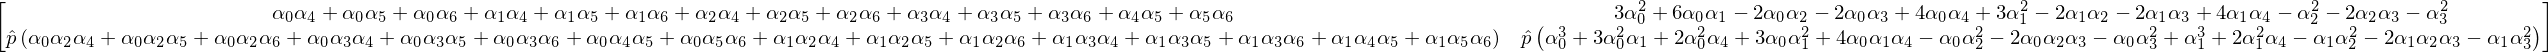

In [9]:
a,b=r2._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=r2._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([[simplify(a), simplify(a_)], [simplify(b),simplify(b_)]])

## r3

In [10]:
r3 = incidence_matrix(edges = [ [0,1],[0,2],[1,3], [3,4], [3,5],[2,4],[2,5] ],
                      external_vertices=[0,1])
set_source_sink_flow(r3)
ring_diagram(r3, options={"show_labels"})

init exceptions [0, 1, 3, 7, 8]
sourcify 0 along [0 1 7] except [0, 1, 3, 7, 8]
sinkify 1 along [0 2 8] except [8, 7]
sinkify 3 along [2 3 4] except [8, 7, 0, 2]
sinkify 5 along [4 6] except [8, 7, 0, 2, 3, 4]
sinkify 2 along [1 5 6] except [8, 7, 0, 2, 3, 4, 6]
sinkify 4 along [3 5] except [8, 7, 0, 2, 3, 4, 6, 1, 5]


In [44]:
#show_spanning_trees(r3)
r3

incidence_matrix([[ 1,  1,  0,  0,  0,  0,  0, -1,  0],
                  [-1,  0, -1,  0,  0,  0,  0,  0, -1],
                  [ 0, -1,  0,  0,  0, -1,  1,  0,  0],
                  [ 0,  0,  1, -1, -1,  0,  0,  0,  0],
                  [ 0,  0,  0,  1,  0,  1,  0,  0,  0],
                  [ 0,  0,  0,  0,  1,  0, -1,  0,  0],
                  [ 0,  0,  0,  0,  0,  0,  0,  1,  1]])

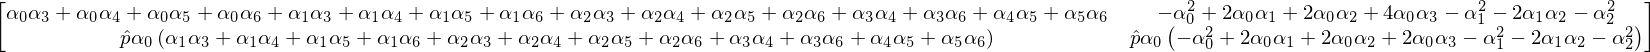

In [12]:
a,b=r3._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=r3._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([[simplify(a), simplify(a_)], [simplify(b),simplify(b_)]])

## r4

In [13]:
r4= incidence_matrix(edges = [ [0,1],[0,2],[2,3], [3,4], [4,1],[2,5],[5,3] ],
                      external_vertices=[0,1])
set_source_sink_flow(r4)
ring_diagram(r4, options={"show_labels"})

init exceptions [0, 1, 2, 7, 8]
sourcify 0 along [0 1 7] except [0, 1, 2, 7, 8]
sinkify 1 along [0 4 8] except [8, 7]
sinkify 4 along [3 4] except [8, 7, 0, 4]
sinkify 3 along [2 3 6] except [8, 7, 0, 4, 3]
sinkify 5 along [5 6] except [8, 7, 0, 4, 3, 2, 6]
sinkify 2 along [1 2 5] except [8, 7, 0, 4, 3, 2, 6, 5]


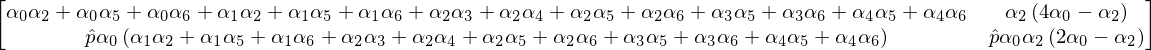

In [14]:
a,b=r4._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=r4._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([[simplify(a), simplify(a_)], [simplify(b),simplify(b_)]])

## r5

In [15]:
r5 = incidence_matrix(edges = [ [0,1],[0,2],[1,3], [2,3], [3,2] ],
                      external_vertices=[0,1])
set_source_sink_flow(r5)
ring_diagram(r5, options={"show_labels"})

init exceptions [0, 1, 3, 5, 6]
sourcify 0 along [0 1 5] except [0, 1, 3, 5, 6]
sinkify 1 along [0 2 6] except [5, 6]
sinkify 3 along [2 3 4] except [5, 6, 0, 2]
sinkify 2 along [1 3 4] except [5, 6, 0, 2, 3, 4]


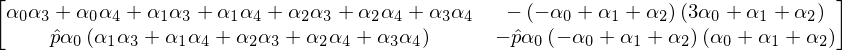

In [16]:
a,b=r5._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=r5._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([[simplify(a), simplify(a_)], [simplify(b),simplify(b_)]])

## r6

In [17]:
r6 = incidence_matrix(edges = [ [0,2],[2,1],[0,3], [3,4], [1,5], [4,5], [5,4] ],
                      external_vertices=[0,1])
set_source_sink_flow(r6)
ring_diagram(r6, options={"show_labels"})

init exceptions [0, 2, 5, 7, 8]
sourcify 0 along [0 2 7] except [0, 2, 5, 7, 8]
sinkify 1 along [1 4 8] except [8, 7]
sinkify 2 along [0 1] except [8, 7, 1, 4]
sinkify 5 along [4 5 6] except [8, 7, 1, 4, 0]
sinkify 4 along [3 5 6] except [8, 7, 1, 4, 0, 5, 6]
sinkify 3 along [2 3] except [8, 7, 1, 4, 0, 5, 6, 3]


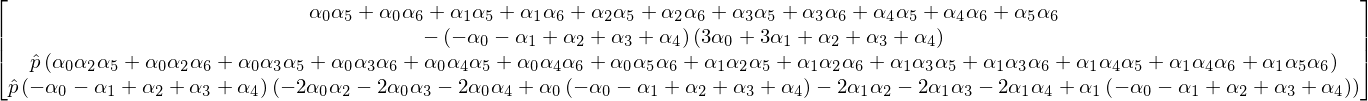

In [18]:
a,b=r6._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=r6._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([simplify(a), simplify(a_),simplify(b),simplify(b_)])

## r7

In [35]:
r7 = incidence_matrix(edges = [ [0,2], [2,3], [3,1], [1,4], [4,5], [0,4], [5,3] ],  external_vertices=[0,1])
set_source_sink_flow(r7)
#r7.flip_edges(4)
ring_diagram(r7, options={"show_labels"})


init exceptions [0, 2, 3, 7, 8]
sourcify 0 along [0 5 7] except [0, 2, 3, 7, 8]
sourcify 4 along [3 4 5] except [0, 2, 3, 7, 8, 5]
sourcify 5 along [4 6] except [0, 2, 3, 7, 8, 5, 4]
sourcify 3 along [1 2 6] except [0, 2, 3, 7, 8, 5, 4, 6]
sourcify 2 along [0 1] except [0, 2, 3, 7, 8, 5, 4, 6, 1]
sourcify 2 along [0 1] except [0, 2, 3, 7, 8, 5, 4, 6, 1]
sourcify 2 along [0 1] except [0, 2, 3, 7, 8, 5, 4, 6, 1]
sourcify 5 along [4 6] except [0, 2, 3, 7, 8, 5, 4, 6, 1]
sourcify 4 along [3 4 5] except [0, 2, 3, 7, 8, 5, 4, 6, 1]
sinkify 1 along [2 3 8] except [1, 4, 5, 6, 7, 8]


In [36]:
a,b=r7._symanzik_pols_(True,True,False,use_zero_mass=True)
b

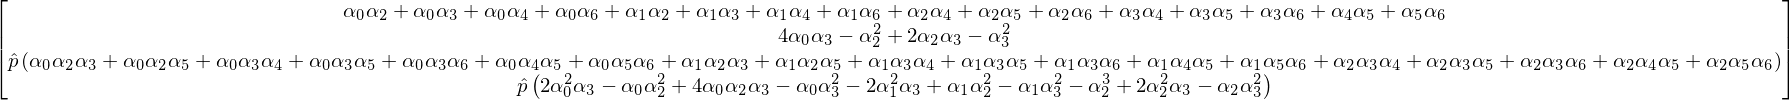

In [37]:
a,b=r7._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=r7._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([simplify(a), simplify(a_),simplify(b),simplify(b_)])

In [22]:
r8 = incidence_matrix(edges = [ [0,2],[2,3],[3,1],[1,5],[5,4],[4,3],[4,0] ], external_vertices=[0,1])
set_source_sink_flow(r8)
ring_diagram(r8, options={"show_labels"})

init exceptions [0, 2, 3, 7, 8]
sourcify 0 along [0 6 7] except [0, 2, 3, 7, 8]
sourcify 4 along [4 5 6] except [0, 2, 3, 7, 8, 6]
sourcify 5 along [3 4] except [0, 2, 3, 7, 8, 6, 4]
sourcify 5 along [3 4] except [0, 2, 3, 7, 8, 6, 4, 5]
sourcify 3 along [1 2 5] except [0, 2, 3, 7, 8, 6, 4, 5]
sourcify 2 along [0 1] except [0, 2, 3, 7, 8, 6, 4, 5, 1]
sourcify 2 along [0 1] except [0, 2, 3, 7, 8, 6, 4, 5, 1]
sourcify 2 along [0 1] except [0, 2, 3, 7, 8, 6, 4, 5, 1]
sourcify 5 along [3 4] except [0, 2, 3, 7, 8, 6, 4, 5, 1]
sourcify 3 along [1 2 5] except [0, 2, 3, 7, 8, 6, 4, 5, 1]
sourcify 4 along [4 5 6] except [0, 2, 3, 7, 8, 6, 4, 5, 1]
sinkify 1 along [2 3 8] except [1, 4, 5, 6, 7, 8]


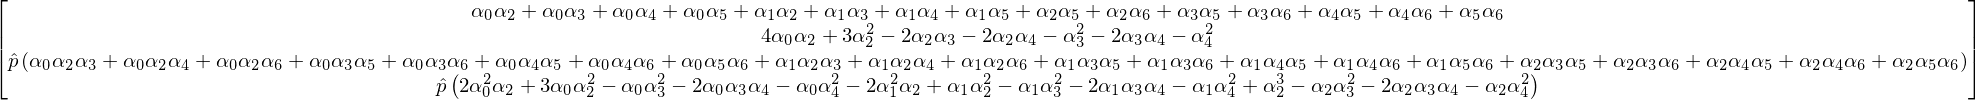

In [23]:
a,b=r8._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=r8._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([simplify(a), simplify(a_),simplify(b),simplify(b_)])

## r9

In [24]:
r9 = incidence_matrix(edges = [ [0,2],[2,3],[3,4],[4,1],[1,5],[5,3],[5,0] ], external_vertices=[0,1])
set_source_sink_flow(r9)
ring_diagram(r9, options={"show_labels"})

init exceptions [0, 2, 4, 7, 8]
sourcify 0 along [0 6 7] except [0, 2, 4, 7, 8]
sourcify 5 along [4 5 6] except [0, 2, 4, 7, 8, 6]
sourcify 3 along [1 2 5] except [0, 2, 4, 7, 8, 6, 5]
sourcify 2 along [0 1] except [0, 2, 4, 7, 8, 6, 5, 1]
sourcify 2 along [0 1] except [0, 2, 4, 7, 8, 6, 5, 1]
sourcify 2 along [0 1] except [0, 2, 4, 7, 8, 6, 5, 1]
sourcify 3 along [1 2 5] except [0, 2, 4, 7, 8, 6, 5, 1]
sourcify 5 along [4 5 6] except [0, 2, 4, 7, 8, 6, 5, 1]
sinkify 1 along [3 4 8] except [1, 5, 6, 7, 8]
sinkify 4 along [2 3] except [1, 5, 6, 7, 8, 3, 4]


In [48]:
a,b=r9._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=r9._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([simplify(a), simplify(a_),simplify(b),simplify(b_)])
latex(simplify(b))

'\\hat{p} \\left(\\alpha_{0} \\alpha_{2} \\alpha_{4} + \\alpha_{0} \\alpha_{2} \\alpha_{6} + \\alpha_{0} \\alpha_{3} \\alpha_{4} + \\alpha_{0} \\alpha_{3} \\alpha_{6} + \\alpha_{0} \\alpha_{4} \\alpha_{5} + \\alpha_{0} \\alpha_{4} \\alpha_{6} + \\alpha_{0} \\alpha_{5} \\alpha_{6} + \\alpha_{1} \\alpha_{2} \\alpha_{4} + \\alpha_{1} \\alpha_{2} \\alpha_{6} + \\alpha_{1} \\alpha_{3} \\alpha_{4} + \\alpha_{1} \\alpha_{3} \\alpha_{6} + \\alpha_{1} \\alpha_{4} \\alpha_{5} + \\alpha_{1} \\alpha_{4} \\alpha_{6} + \\alpha_{1} \\alpha_{5} \\alpha_{6} + \\alpha_{2} \\alpha_{4} \\alpha_{5} + \\alpha_{2} \\alpha_{4} \\alpha_{6} + \\alpha_{2} \\alpha_{5} \\alpha_{6} + \\alpha_{3} \\alpha_{4} \\alpha_{5} + \\alpha_{3} \\alpha_{4} \\alpha_{6} + \\alpha_{3} \\alpha_{5} \\alpha_{6}\\right)'

## r10

In [26]:
r10 = incidence_matrix(edges = [ [0,2],[2,3],[3,1],[1,4],[4,5],[5,2],[4,0] ],  external_vertices=[0,1])
set_source_sink_flow(r10)
ring_diagram(r10, options={"show_labels"})

init exceptions [0, 1, 3, 7, 8]
sourcify 0 along [0 6 7] except [0, 1, 3, 7, 8]
sourcify 4 along [3 4 6] except [0, 1, 3, 7, 8, 6]
sourcify 5 along [4 5] except [0, 1, 3, 7, 8, 6, 4]
sourcify 2 along [0 1 5] except [0, 1, 3, 7, 8, 6, 4, 5]
sourcify 5 along [4 5] except [0, 1, 3, 7, 8, 6, 4, 5]
sourcify 4 along [3 4 6] except [0, 1, 3, 7, 8, 6, 4, 5]
sinkify 1 along [2 3 8] except [4, 5, 6, 7, 8]
sinkify 3 along [1 2] except [4, 5, 6, 7, 8, 2, 3]


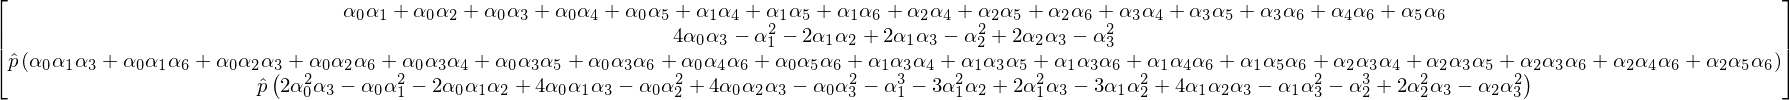

In [27]:
a,b=r10._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=r10._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([simplify(a), simplify(a_),simplify(b),simplify(b_)])

## r11

In [28]:
r11 = incidence_matrix(edges = [ [0,2],[2,3],[3,1],[1,4],[4,3],[4,5],[5,0] ], external_vertices=[0,1])
set_source_sink_flow(r11)
ring_diagram(r11, options={"show_labels"})

init exceptions [0, 2, 3, 7, 8]
sourcify 0 along [0 6 7] except [0, 2, 3, 7, 8]
sourcify 5 along [5 6] except [0, 2, 3, 7, 8, 6]
sourcify 4 along [3 4 5] except [0, 2, 3, 7, 8, 6, 5]
sourcify 3 along [1 2 4] except [0, 2, 3, 7, 8, 6, 5, 4]
sourcify 2 along [0 1] except [0, 2, 3, 7, 8, 6, 5, 4, 1]
sourcify 2 along [0 1] except [0, 2, 3, 7, 8, 6, 5, 4, 1]
sourcify 2 along [0 1] except [0, 2, 3, 7, 8, 6, 5, 4, 1]
sourcify 3 along [1 2 4] except [0, 2, 3, 7, 8, 6, 5, 4, 1]
sourcify 4 along [3 4 5] except [0, 2, 3, 7, 8, 6, 5, 4, 1]
sourcify 5 along [5 6] except [0, 2, 3, 7, 8, 6, 5, 4, 1]
sinkify 1 along [2 3 8] except [1, 4, 5, 6, 7, 8]


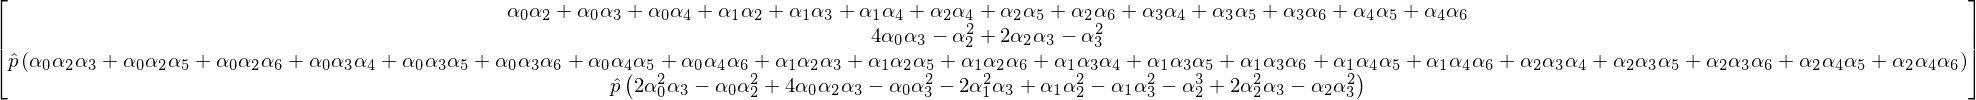

In [29]:
a,b=r11._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=r11._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([simplify(a), simplify(a_),simplify(b),simplify(b_)])

# C

## c0

In [30]:
c0 = incidence_matrix(edges = [ [0,2],[2,1],[0,3], [3,1] ], external_vertices=[0,1])
set_source_sink_flow(c0)
ring_diagram(c0, options={"show_labels"})

init exceptions [0, 2, 4, 5]
sourcify 0 along [0 2 4] except [0, 2, 4, 5]
sinkify 1 along [1 3 5] except [4, 5]
sinkify 2 along [0 1] except [4, 5, 1, 3]
sinkify 3 along [2 3] except [4, 5, 1, 3, 0]


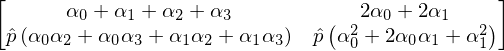

In [31]:
a,b=c0._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=c0._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([[simplify(a), simplify(a_)], [simplify(b),simplify(b_)]])

## c1

In [32]:
c1 = incidence_matrix(edges = [ [0,2],[2,1],[0,3], [4,1], [3,5], [3,6], [4,5], [4,6] ],  external_vertices=[0,1])
set_source_sink_flow(c1)
ring_diagram(c1, options={"show_labels"})

init exceptions [0, 2, 4, 8, 9]
sourcify 0 along [0 2 8] except [0, 2, 4, 8, 9]
sinkify 1 along [1 3 9] except [8, 9]
sinkify 2 along [0 1] except [8, 9, 1, 3]
sinkify 4 along [3 6 7] except [8, 9, 1, 3, 0]
sinkify 5 along [4 6] except [8, 9, 1, 3, 0, 6, 7]
sinkify 6 along [5 7] except [8, 9, 1, 3, 0, 6, 7, 4]
sinkify 3 along [2 4 5] except [8, 9, 1, 3, 0, 6, 7, 4, 5]


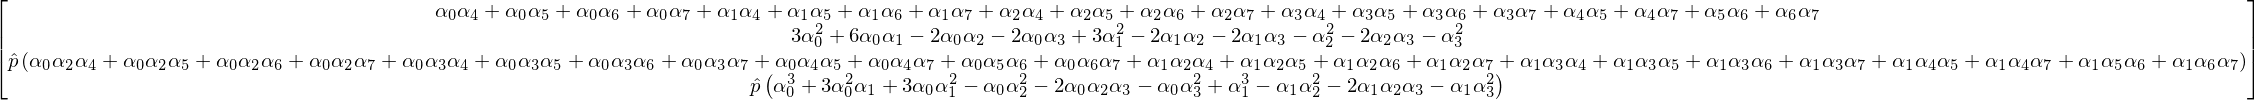

In [33]:
a,b=c1._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=c1._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([simplify(a), simplify(a_),simplify(b),simplify(b_)])

## c2

In [ ]:
c2 = incidence_matrix(edges = [ [0,2],[2,1],[1,4], [4,5], [0,3], [5,3], [3,6], [5,6] ],  external_vertices=[0,1])
set_source_sink_flow(c2)
ring_diagram(c2, options={"show_labels"})

In [ ]:
a,b=c2._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=c2._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([simplify(a), simplify(a_),simplify(b),simplify(b_)])

## c3

In [ ]:
c3 = incidence_matrix(edges = [ [0,2],[2,1], [1,4], [3,5], [4,6], [6,5], [5,6],[0,3] ], external_vertices=[0,1])
set_source_sink_flow(c3)
ring_diagram(c3, options={"show_labels"})

In [ ]:
a,b=c3._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=c3._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([simplify(a), simplify(a_),simplify(b),simplify(b_)])

## c4

In [ ]:
c4 = incidence_matrix(edges = [ [0,2],[2,3], [1,4], [3,4], [1,5], [6,5], [6,3],[0,6] ], external_vertices=[0,1])
set_source_sink_flow(c4)
ring_diagram(c4, options={"show_labels"})

In [ ]:
a,b=c4._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=c4._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([simplify(a), simplify(a_),simplify(b),simplify(b_)])

## c5

In [ ]:
c5 = incidence_matrix(edges = [ [0,2],[2,3], [1,3], [1,4], [4,5], [6,5], [6,3],[0,5] ], external_vertices=[0,1])
set_source_sink_flow(c5)
ring_diagram(c5, options={"show_labels"})

In [ ]:
c5

In [ ]:
a,b=c5._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=c5._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([simplify(a), simplify(a_),simplify(b),simplify(b_)])

## c6

In [ ]:
c6 = incidence_matrix(edges = [ [0,2],[2,3], [1,3], [1,4], [4,5], [6,5], [6,2],[0,5] ],  external_vertices=[0,1])
set_source_sink_flow(c6)
ring_diagram(c6, options={"show_labels"})

In [ ]:
a,b=c6._symanzik_pols_(True,True,False,use_zero_mass=True)
a_,b_=c6._symanzik_pols_(True,True,True,use_zero_mass=True)
Matrix([simplify(a), simplify(a_),simplify(b),simplify(b_)])